In [1]:
import numpy as np
import matplotlib . pyplot as plt
from numpy. fft import fft , ifft , fftshift
#from scipy . fft import fft , ifft , fftshift
from scipy.signal.windows import hann, flattop

In [2]:
#generating signals - Variant 1
f_1 = 300 # Hz
f_2 = 300.25 # Hz
f_3 = 299.75 #Hz
f_s = 400 # Hz
N = 2000
k = np.arange(N)
x_1 = np.sin(2*np.pi*f_1/f_s*k)
x_2 = np.sin(2*np.pi*f_2/f_s*k)
x_3 = np.sin(2*np.pi*f_3/f_s*k)

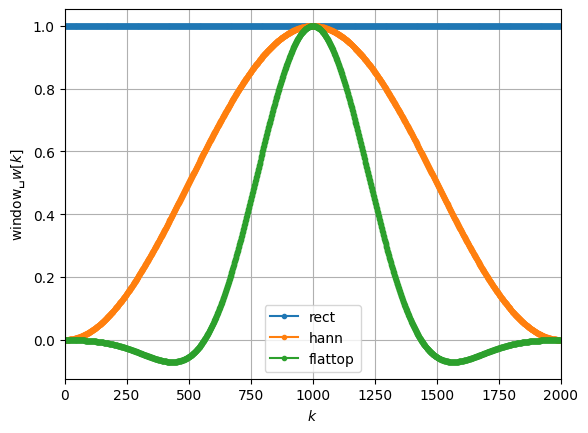

In [15]:
#generating windows
wrect = np.ones(N)
wflattop = flattop (N, sym=False)
whann = hann(N, sym=False)
plt.plot(wrect,"C0o-",ms=3,label="rect")
plt.plot(whann,"C1o-", ms=3, label="hann")
plt.plot(wflattop,"C2o-",ms=3, label="flattop")
plt.xlabel(r"$k$")
plt.ylabel(r"window␣$w[k]$")
plt.xlim(0, N)
plt.legend()
plt.grid(True)

In [4]:
X1wrect = fft(x_1)
X2wrect = fft(x_2)
X3wrect = fft(x_3)

In [5]:
X1whann = fft(x_1*whann)
X2whann = fft(x_2*whann)
X3whann = fft(x_3*whann)

In [6]:
X1wflattop = fft(x_1*wflattop)
X2wflattop = fft(x_2*wflattop)
X3wflattop = fft(x_3*wflattop)

In [7]:
def fft2db(X):
    N = X.size
    Xtmp = 2/N*X
    Xtmp[0]*=1/2
    if N%2 == 0:
        Xtmp[N//2] = Xtmp[N//2]/2
    return 20*np.log10(np.abs(Xtmp))

In [8]:
df = f_s/N
f = np.arange(N)*df

In [9]:
f[1999]

399.8

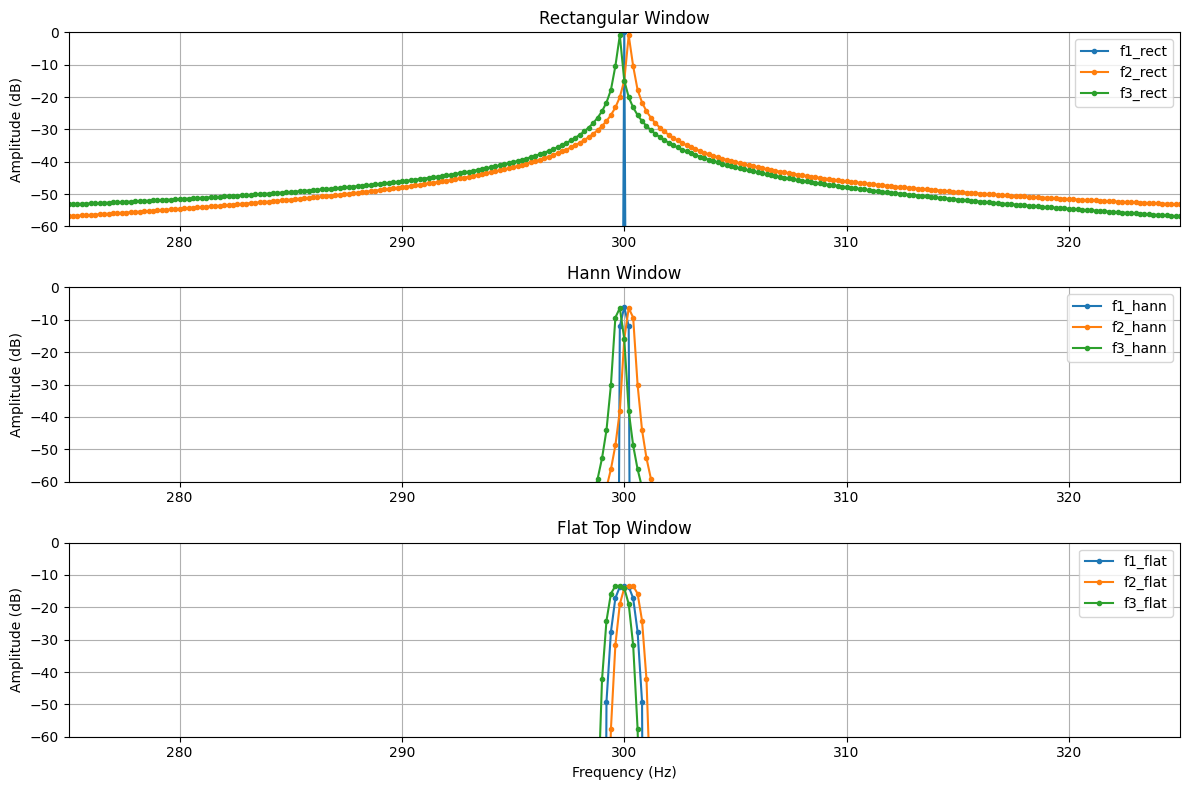

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1wrect),"C0o-" ,ms=3, label="f1_rect")
plt.plot(f, fft2db(X2wrect),"C1o-" ,ms=3, label="f2_rect")
plt.plot(f, fft2db(X3wrect),"C2o-" ,ms=3, label="f3_rect")
plt.xlim(275, 325)
plt.ylim(-60, 0)
plt.title('Rectangular Window')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1whann),"C0o-",ms=3, label="f1_hann")
plt.plot(f, fft2db(X2whann),"C1o-",ms=3, label="f2_hann")
plt.plot(f, fft2db(X3whann),"C2o-",ms=3, label="f3_hann")
plt.xlim(275, 325)
plt.ylim(-60, 0)
plt.title('Hann Window')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid(True)

# Flat Top Window
plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1wflattop),"C0o-",ms=3, label="f1_flat")
plt.plot(f, fft2db(X2wflattop),"C1o-",ms=3, label="f2_flat")
plt.plot(f, fft2db(X3wflattop),"C2o-",ms=3, label="f3_flat")
plt.xlim(275, 325)
plt.ylim(-60, 0)
plt.title('Flat Top Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\121731\AppData\Local\Temp\ipykernel_16596\3349990347.py:8: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)


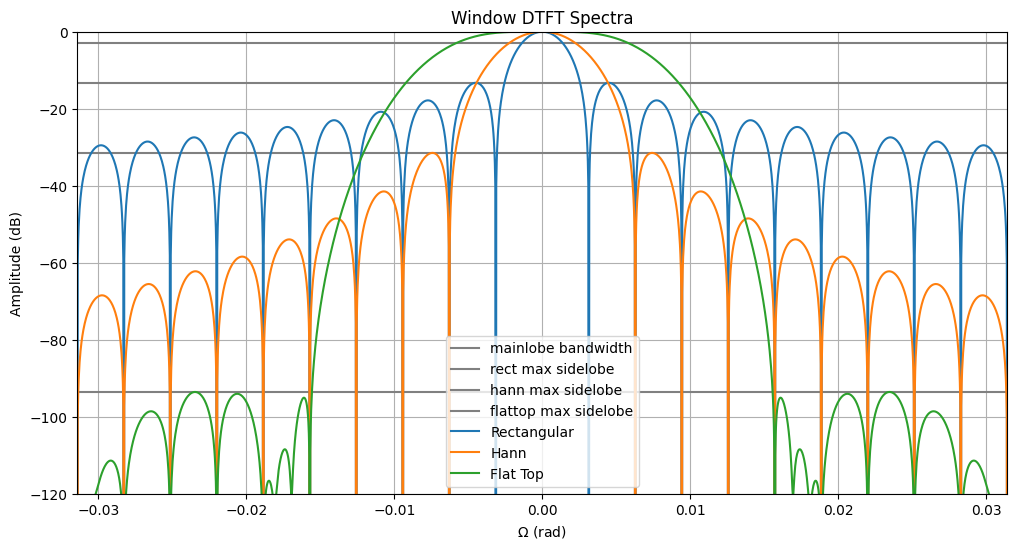

In [25]:
def win_dtft_dB(w):
    N = w.size
    Nz = 100 * N  
    W = np.zeros(Nz)
    W[:N] = w
    W = np.abs(fftshift(fft(W)))
    W /= np.max(W)
    W = 20 * np.log10(W)
    Omega = 2 * np.pi * np.arange(Nz) / Nz - np.pi
    return Omega, W

plt.figure(figsize=(12, 6))

plt.plot([-np.pi, np.pi], [-3.01, -3.01], color='gray', label='mainlobe bandwidth')  # mainlobe bandwidth
plt.plot([-np.pi, np.pi], [-13.3, -13.3], color='gray', label='rect max sidelobe')    # rect max sidelobe
plt.plot([-np.pi, np.pi], [-31.5, -31.5], color='gray', label='hann max sidelobe')    # hann max sidelobe
plt.plot([-np.pi, np.pi], [-93.6, -93.6], color='gray', label='flattop max sidelobe') # flattop max sidelobe


Omega, W_rect = win_dtft_dB(wrect)
plt.plot(Omega, W_rect, label='Rectangular')

Omega, W_hann = win_dtft_dB(whann)
plt.plot(Omega, W_hann, label='Hann')

Omega, W_flattop = win_dtft_dB(wflattop)
plt.plot(Omega, W_flattop, label='Flat Top')

plt.xlim(-np.pi/100, np.pi/100)
plt.ylim(-120, 0)
plt.xlabel(r'$\Omega$ (rad)')
plt.ylabel('Amplitude (dB)')
plt.title('Window DTFT Spectra')
plt.legend()
plt.grid(True)
plt.show()
